# Step 1: Installation and Setup

In [1]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

     |████████████████████████████████| 394.7MB 41kB/s 
     |████████████████████████████████| 471kB 44.8MB/s 
     |████████████████████████████████| 14.5MB 352kB/s 
     |████████████████████████████████| 3.8MB 34.1MB/s 
     |████████████████████████████████| 10.6MB 54.7MB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.4.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.4.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [5]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [6]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [9]:
np.max(x_train), np.min(x_train), np.mean(x_train)

(255, 0, 72.94035223214286)

In [10]:
np.max(y_train), np.min(y_train)

(9, 0)

In [11]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


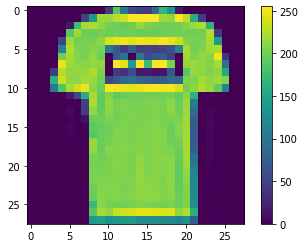

In [12]:
# Data Exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [13]:
y_train[1]

0

In [14]:
# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

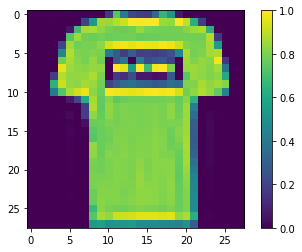

In [15]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [16]:
# Flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [17]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [18]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Step 3: Building the Model

In [19]:
# Define an object
model = tf.keras.models.Sequential()
# sequence of layers

In [20]:
# Adding first fully connected hidden layer
# 1) units (No of neurons) = 128
# 2) activation function = ReLU
# 3) input shape = 784
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

In [21]:
# Adding the second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

In [22]:
# Adding the output layer
# 1) units = 10
# 2) activation = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Step 4: Training the model

In [23]:
# Compiling the model
# 1) Optimizer = adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) metrices = sparse_categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Training the model
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7071 - sparse_categorical_accuracy: 0.7526
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4235 - sparse_categorical_accuracy: 0.8451
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3768 - sparse_categorical_accuracy: 0.8655
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3733 - sparse_categorical_accuracy: 0.8651
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3440 - sparse_categorical_accuracy: 0.8727
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3401 - sparse_categorical_accuracy: 0.8748
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3316 - sparse_categorical_accuracy: 0.8781
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3202 - sparse_categorical_accuracy: 0.8819
Epoch 9/10
1875/1875 [==========

# Step 5: Model evaluation and prediction

In [26]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.8745


In [27]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.8744999766349792


In [28]:
# Model prediction
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [30]:
y_pred[110],  y_test[110] # predicted and actual output

(2, 2)

In [31]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [32]:
# Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[851   0  31  17   1   1  89   0  10   0]
 [  2 970   3  19   3   0   2   0   1   0]
 [ 13   0 878   8  55   0  42   0   4   0]
 [ 23   6  21 889  24   0  33   0   4   0]
 [  0   1 201  34 711   0  49   0   4   0]
 [  0   0   0   1   0 965   0  23   1  10]
 [147   1 157  22  67   0 595   0  11   0]
 [  0   0   0   0   0  14   0 957   1  28]
 [  0   1   6   4   2   2   5   3 977   0]
 [  1   0   0   0   0   7   0  40   0 952]]


In [33]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8745
